## Trabalhando com dados

--------------------------------------------------------------------------------------------------------------------------------------

In [2]:
from typing import List, Dict 
from collections import Counter
import math
import matplotlib.pyplot as plt
import random

In [3]:
def bucketsize(point: float, bucket_size: float) -> float:
    """Coloque o ponto perto do próximo mínimo múltiplo de bucket_size"""
    return bucket_size * math.floor(point/bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Coloca os pontos em buckets e conta o número de pontos em cada bucket"""
    return Counter(bucketsize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

In [4]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance: float = 0.00001) -> float:
    """Encontre o inverso aproximado usando a pesquisa binária"""

    # se não for padrão, compute o padrão e redimensione
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0 # normal_cdf(-10) é muito próxima de 0
    hi_z = 10.0 # normal_cdf(10) é muito próxima de 1

    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # Considere o ponto médio
        mid_p = normal_cdf(mid_z)  # e o valor da CDF
        if mid_p < p:
            low_z = mid_z          # O ponto médio é muito baixo, procure um maior
        else: 
            hi_z = mid_z           # O ponto médio é muito alto, procure um menor

    return mid_z

In [5]:
uniform = [200 * random.random() - 100 for _ in range(10000)]
# distribuição normal com média 0 e desvio padrão 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

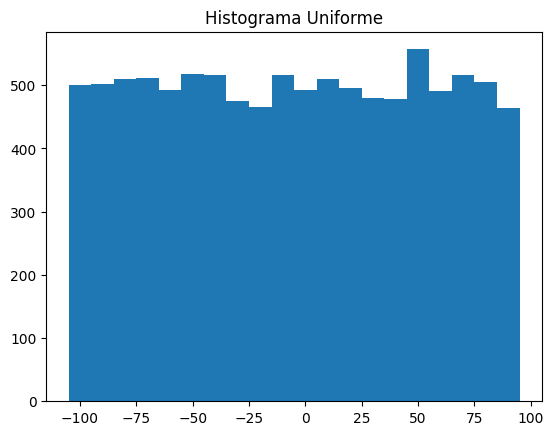

In [6]:
plot_histogram(uniform, 10, "Histograma Uniforme")

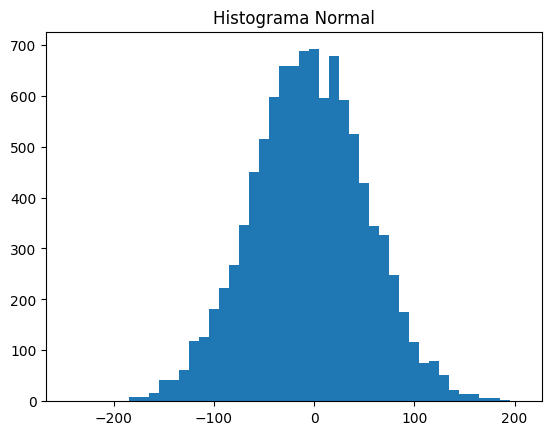

In [7]:
plot_histogram(normal, 10, "Histograma Normal")

In [8]:
def random_normal() -> float:
    """Retorna um ponto aleatório de uma distribuição normal padrão"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

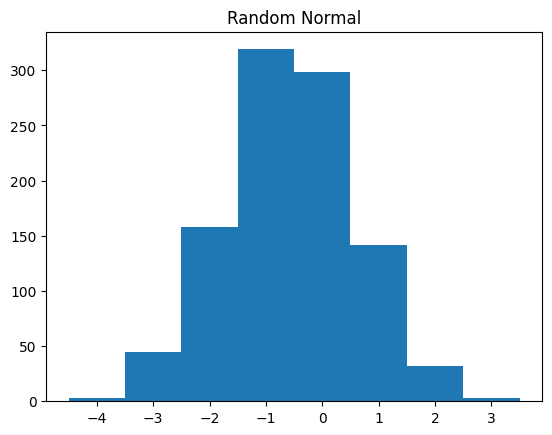

In [9]:
plot_histogram(ys2, 1, "Random Normal")

Text(0.5, 1.0, 'Distribuições conjuntas bem diferentes')

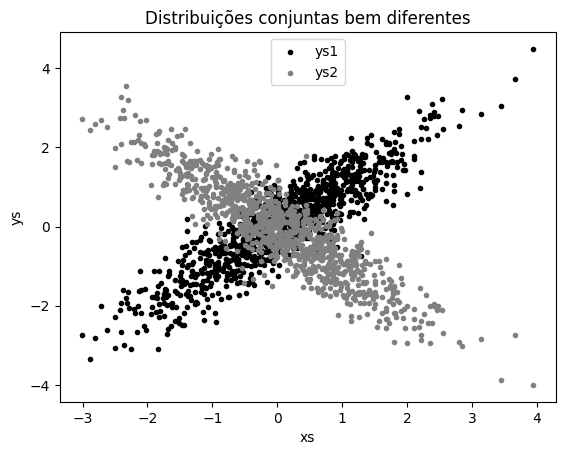

In [10]:
plt.scatter(xs, ys1, marker=".", color='black', label='ys1')
plt.scatter(xs, ys2, marker=".", color='gray', label='ys2')
plt.xlabel("xs")
plt.ylabel("ys")
plt.legend(loc=9)
plt.title("Distribuições conjuntas bem diferentes")

In [1]:
# Funções do capítulo de estatística
def desvio_padrao(lista: list) -> float:
    """Calcula o desvio padrão"""
    media = sum(lista) / len(lista)
    a = [i - media for i in lista]
    b = sum([i**2 for i in a]) / len(lista)
    return math.sqrt(b)
def desvio_media(xs: list[float]) -> list[float]:
    """Traduza xs subtraindo sua média (para que o resultado tenha média 0)"""
    xs_bar = sum(xs)/len(xs)
    return [x - xs_bar for x in xs]
def dot(v, w) -> float:
    """Calcula o produto de dois vetores, v_1 * w_1 + v_2 * w_2..."""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
def covariance(xs: list[float], ys: list[float]) -> float:
    assert len(xs) == len(ys), 'as listas devem ter o mesmo tamnho'

    return dot(desvio_media(xs), desvio_media(ys)) / (len(xs) - 1)
def correlacao(xs: list[float], ys: list[float]) -> float:
    """Mede a variação simultânea de xs e ys a partir de suas médias"""

    stdev_x = desvio_padrao(xs)
    stdev_y = desvio_padrao(ys)

    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # se não houver variação, a correlção será zero

In [12]:
# Correlação de matrizes

from typing import Callable
Matrix = List[List[float]]
Vector = List[float]

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Retorna uma matriz num_rows x num_cols
    cuja entrada (i, j) é entry_fn(i,j)
    """
    return [[entry_fn(i,j)               # com i crie uma lista
             for j in range(num_cols)    # [entry_fn(i,0), ...]
             for i in range(num_rows)]]  # crie uma lista para cada i

def correlacao_matrizes(data: List[Vector]) -> Matrix:
    """
    Retorna a matriz len(data) x len(data), na qual a entrada
    (i,j) é a correlação entre data[i] e data[j]
    """
    def correlacao_ij(i: int, j:int) -> float:
        return correlacao(data[i], data[j])
    
    return make_matrix(len(data), len(data), correlacao_ij)

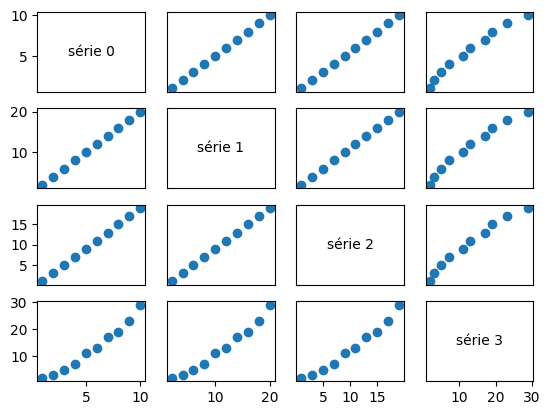

In [4]:
corr_data = [
    [1,2,3,4,5,6,7,8,9,10],
    [2,4,6,8,10,12,14,16,18,20],
    [1,3,5,7,9,11,13,15,17,19],
    [2,3,5,7,11,13,17,19,23,29]
]

num_vectors = len(corr_data)

fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        else: ax[i][j].annotate('série ' + str(i), (0.5, 0.5),
                                xycoords='axes fraction', ha='center', va='center')
            
        if i < num_vectors -1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

In [5]:
import tqdm

for i in tqdm.tqdm(range(100)):
    _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


In [6]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

                t.set_description(f'{len(primes)} primes')

    return primes

my_primes = primes_up_to(100_000)

9592 primes: 100%|██████████| 99997/99997 [00:44<00:00, 2242.13it/s]
